In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
# Parameters
T = 0.05
N = 100
h = np.pi / N

# Construct the matrix B
B = np.diag(np.ones(N-2), -1) - 2*np.eye(N-1) + np.diag(np.ones(N-2), 1)
B[0, 0] = -1  # Left boundary condition
B[N-2, N-2] = -1  # Right boundary condition
B /= h**2

# Compute the matrix exponential
A = sp.linalg.expm(T*B)

# Perform Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(A)

99


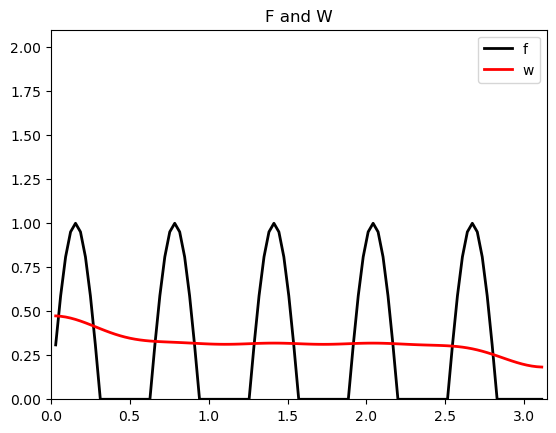

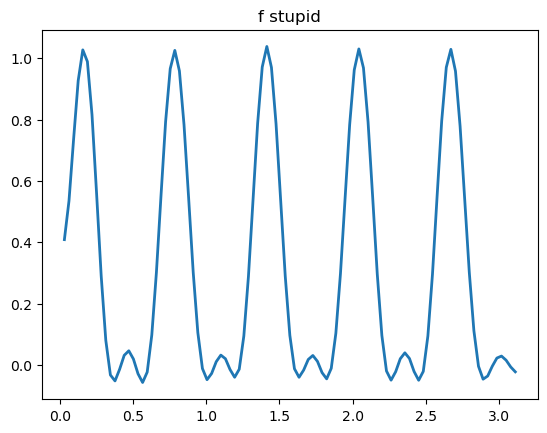

In [2]:
# Parameters
a = 40 / (3 * np.pi)
b1 = -8 / 3
b2 = 20 / 3

# Generate grid points
x = np.linspace(h, np.pi - h, N - 1)

# Construct the function f
f = np.sin(10*x)
ind = f > 0
f *= ind
print(len(f))
# Calculate the final distribution w
w = A@f.T

# Plot f and w
plt.figure()
plt.plot(x, f, 'k', linewidth=2, label='f')
plt.plot(x, w, 'r', linewidth=2, label='w')
plt.axis([0, np.pi, 0, 2.1])
plt.title('F and W')
plt.legend()
plt.show()

# Calculate f_stupid
f_stupid = np.linalg.lstsq(A, w, rcond=None)[0]

# Plot f_stupid
plt.figure()
plt.plot(x, f_stupid, linewidth=2)
plt.title('f stupid')
plt.show()


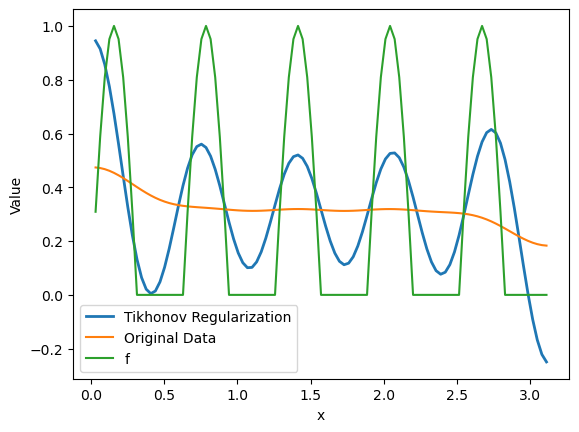

In [8]:
# Parameters
lmbda = 0.01 # Tikhonov regularization parameter

# Solve the Tikhonov regularized problem


w_column = w.reshape(-1, 1)

A_tik = np.vstack([A, lmbda*np.eye(A.shape[1])])
b_tik = np.vstack([w_column, np.zeros((A.shape[0], 1))])

tikhonov =  np.linalg.inv(A_tik.T@A_tik)@A_tik.T@b_tik

# Plot the results
plt.figure()
plt.plot(x, tikhonov, linewidth=2, label='Tikhonov Regularization')
plt.plot(x, w, label='Original Data')
plt.plot(x, f, label='f')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.show()